In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1,1)
y = 0.5 * X**2 + X + 2 + np.random.normal( size = (100,1))

### 添加新特征：平方项等

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree = 2) #添加最多几次幂
poly.fit(X)
X2 = poly.transform(X)

In [25]:
X2.shape

(100, 3)

In [26]:
X2[:5, :] #第一列加入了一排1，第二列：x一次方，第三列：x^2

array([[ 1.        , -1.50950416,  2.27860282],
       [ 1.        , -1.29339137,  1.67286123],
       [ 1.        , -0.38030736,  0.14463369],
       [ 1.        , -0.13546157,  0.01834984],
       [ 1.        , -2.27638501,  5.18192872]])

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

(100, 1)
(100, 1)


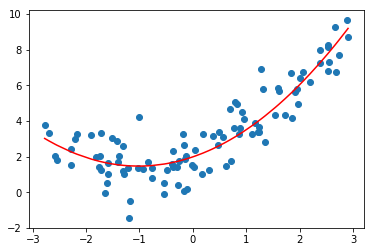

In [29]:
print(X.shape)
print(y.shape)
plt.scatter(X,y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color = 'r')
plt.show()

In [30]:
lin_reg2.coef_

array([[0.        , 1.01994578, 0.50118151]])

In [31]:
lin_reg2.intercept_

array([1.9859777])

### More about PolynomialFeatures

In [34]:
X = np.arange(1,11).reshape(-1,2)
X.shape

(5, 2)

In [35]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [36]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [37]:
X2.shape

(5, 6)

In [38]:
X2 # 1 , x, y, x^2, xy, y^2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [39]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3.shape

(5, 10)

In [40]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

! [Poly degree = 3](img/poly.png)

### Pipeline

PolynomialFeatures ==> StandardScaler ==> LinearRegression

In [41]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1,1)
y = 0.5 * X**2 + X + 2 + np.random.normal( size = (100,1))

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#传入一个列表[], 里面的元素是管道中每一个步骤对应的类，用元组tuple表示
poly_reg = Pipeline([
    ("my_poly", PolynomialFeatures(degree = 2) ), #tuple1： （"自己命名"， 类名）
    ("my_std_scaler", StandardScaler() ),
    ("my_lin_reg", LinearRegression() )
])

In [43]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

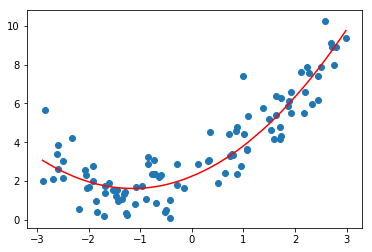

In [45]:
plt.scatter(X,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color = 'r')
plt.show()